In [1]:
# 그래프 범례 한글 깨짐 방지

import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False   

In [2]:
import pandas as pd
df = pd.read_csv('jeju_financial_life_data.csv')

In [3]:
df = df.drop('year_month', axis=1)

In [4]:
df.columns

Index(['zip_cd', 'x_axis', 'y_axis', 'sex', 'age', 'job_majorc', 'job_smallc',
       'job_public', 'job_profession', 'job_self', 'job_none', 'job_other',
       'avg_income', 'med_income', 'avg_spend', 'avg_foreign_spend',
       'avg_debt', 'avg_debt_credit', 'avg_debt_noneb', 'avg_debt_mortgage',
       'avg_debt_deposit', 'avg_debt_collateral', 'avg_credit_rat',
       'medium_resid_rat', 'large_resid_rat', 'vehicle_own_rat'],
      dtype='object')

In [5]:
# 나이과 주택소유와의 관계
# 부동산가격이 없는경우 제외
df1 = df[(df['medium_resid_rat'] != -999999.0) & (df['large_resid_rat'] != -999999.0)].reset_index()
df1 = df1.drop('index', axis=1)
df1.head()

,zip_cd,x_axis,y_axis,sex,age,job_majorc,job_smallc,job_public,job_profession,job_self,...,avg_debt,avg_debt_credit,avg_debt_noneb,avg_debt_mortgage,avg_debt_deposit,avg_debt_collateral,avg_credit_rat,medium_resid_rat,large_resid_rat,vehicle_own_rat
0,63275,126.540259,33.505112,1,29,0.071429,0.214286,0.071429,0.023810,0.000000,...,52627618,50136789,15380494,184344366,0,94485116,4,1.0,0.222222,0.045455
1,63275,126.540259,33.505112,1,44,0.060000,0.220000,0.040000,0.020000,0.200000,...,151188913,16249141,62921690,102893433,6000000,255242361,4,0.7,0.300000,0.098039
2,63275,126.540259,33.505112,1,24,0.000000,0.045455,0.000000,0.000000,0.000000,...,6175392,9602737,4705504,0,0,0,4,1.0,0.500000,0.000000
3,63275,126.540259,33.505112,1,54,0.062500,0.296875,0.046875,0.000000,0.312500,...,62215511,22187078,50831079,115136708,5732916,109002921,4,1.0,0.461538,0.044776
4,63275,126.540259,33.505112,1,59,0.000000,0.177778,0.066667,0.022222,0.177778,...,131970089,39802659,142062159,149038103,1277413,233004028,4,1.0,0.000000,0.042553


In [6]:
df1.columns

Index(['zip_cd', 'x_axis', 'y_axis', 'sex', 'age', 'job_majorc', 'job_smallc',
       'job_public', 'job_profession', 'job_self', 'job_none', 'job_other',
       'avg_income', 'med_income', 'avg_spend', 'avg_foreign_spend',
       'avg_debt', 'avg_debt_credit', 'avg_debt_noneb', 'avg_debt_mortgage',
       'avg_debt_deposit', 'avg_debt_collateral', 'avg_credit_rat',
       'medium_resid_rat', 'large_resid_rat', 'vehicle_own_rat'],
      dtype='object')

In [7]:
# 리스트 조합
import itertools

lst = ['medium_resid_rat', 'large_resid_rat', 'vehicle_own_rat']
combs = []

for i in range(1, len(lst)+1):
    els = [list(x) for x in itertools.combinations(lst, i)]
    combs.extend(els)
    
print(combs)

[['medium_resid_rat'], ['large_resid_rat'], ['vehicle_own_rat'], ['medium_resid_rat', 'large_resid_rat'], ['medium_resid_rat', 'vehicle_own_rat'], ['large_resid_rat', 'vehicle_own_rat'], ['medium_resid_rat', 'large_resid_rat', 'vehicle_own_rat']]


### 주택&차량 소유에 따른 나이 유추

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

accuracy_score_list = []

for i in range(len(combs)):    
    y = df1.age
    X = df1[combs[i]]
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
    Dtree = DecisionTreeClassifier()
    Dtree.fit(x_train,y_train)
    predictions_Decisiontree_model = Dtree.predict(x_test)
    accuracy_score_list.append(accuracy_score(y_test,predictions_Decisiontree_model))
print(accuracy_score_list)

[0.06405228758169934, 0.07581699346405228, 0.13202614379084968, 0.05751633986928104, 0.1411764705882353, 0.11503267973856209, 0.13594771241830064]


In [9]:
col = ["[medium_resid_rat]", "[large_resid_rat]", "[vehicle_own_rat]", "[medium_resid_rat]\n-[large_resid_rat]", '[medium_resid_rat]\n -[vehicle_own_rat]', '[large_resid_rat]\n-[vehicle_own_rat]', '[medium_resid_rat]\n-[large_resid_rat]\n-[vehicle_own_rat]']

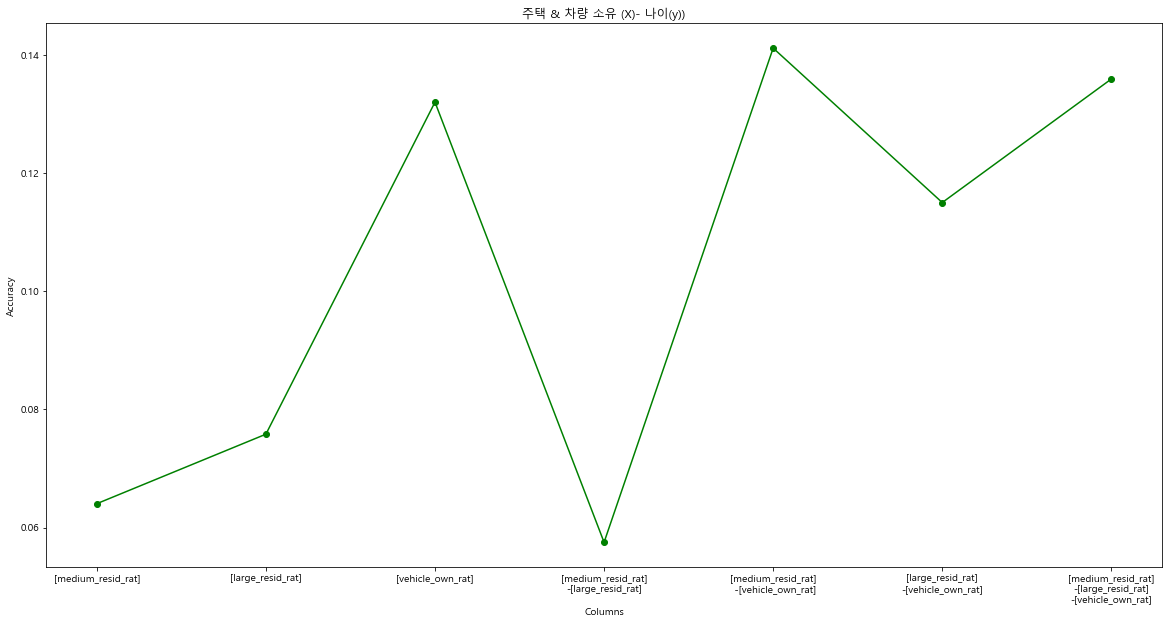

In [11]:
# 관련성 없음..
from matplotlib import pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(col,accuracy_score_list,color='green',marker='o',linestyle='solid')
plt.title('주택 & 차량 소유 (X)- 나이(y))')
plt.ylabel("Accuracy")
plt.xlabel("Columns")
plt.show()

### 경도/위도/주택소유에 따른 우편번호

In [12]:
df1.columns

Index(['zip_cd', 'x_axis', 'y_axis', 'sex', 'age', 'job_majorc', 'job_smallc',
       'job_public', 'job_profession', 'job_self', 'job_none', 'job_other',
       'avg_income', 'med_income', 'avg_spend', 'avg_foreign_spend',
       'avg_debt', 'avg_debt_credit', 'avg_debt_noneb', 'avg_debt_mortgage',
       'avg_debt_deposit', 'avg_debt_collateral', 'avg_credit_rat',
       'medium_resid_rat', 'large_resid_rat', 'vehicle_own_rat'],
      dtype='object')

In [13]:
# 리스트 조합
import itertools

lst = ['x_axis', 'y_axis','large_resid_rat','medium_resid_rat']
combs = []

for i in range(1, len(lst)+1):
    els = [list(x) for x in itertools.combinations(lst, i)]
    combs.extend(els)
    
print(combs)
print(len(combs))

[['x_axis'], ['y_axis'], ['large_resid_rat'], ['medium_resid_rat'], ['x_axis', 'y_axis'], ['x_axis', 'large_resid_rat'], ['x_axis', 'medium_resid_rat'], ['y_axis', 'large_resid_rat'], ['y_axis', 'medium_resid_rat'], ['large_resid_rat', 'medium_resid_rat'], ['x_axis', 'y_axis', 'large_resid_rat'], ['x_axis', 'y_axis', 'medium_resid_rat'], ['x_axis', 'large_resid_rat', 'medium_resid_rat'], ['y_axis', 'large_resid_rat', 'medium_resid_rat'], ['x_axis', 'y_axis', 'large_resid_rat', 'medium_resid_rat']]
15


In [14]:
col = ['[x_axis]', '[y_axis]', '[large\n_resid_rat]','[medium\n_resid_rat]', '[x_axis]\n-[y_axis]','[x_axis]\n-[large_resid_rat]','[x_axis]\n-[medium\n_resid_rat]', '[y_axis]\n-[large\n_resid_rat]','[y_axis]\n-[medium\n_resid_rat]','[large\n_resid_rat]\n-[medium\n_resid_rat]','[x_axis]\n-[y_axis]\n-[large\n_resid_rat]','[x_axis]\n-[y_axis]\n-[medium\n_resid_rat]','[x_axis]\n-[large\n_resid_rat]\n-[medium\n_resid_rat]','[y_axis]\n-[large\n_resid_rat]\n-[medium\n_resid_rat]','[x_axis]\n-[y_axis]\n-[large\n_resid_rat]\n-[medium\n_resid_rat]']

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

accuracy_score_list = []

for i in range(len(combs)):
    X = df1[combs[i]]
    y = df1.zip_cd
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
    Dtree = DecisionTreeClassifier()
    Dtree.fit(x_train,y_train)
    predictions_Decisiontree_model = Dtree.predict(x_test)
    accuracy_score_list.append(accuracy_score(y_test,predictions_Decisiontree_model))
print(accuracy_score_list)
print(len(accuracy_score_list))

[1.0, 0.9882352941176471, 0.0392156862745098, 0.05228758169934641, 1.0, 0.9986928104575163, 1.0, 0.9856209150326798, 0.9908496732026144, 0.13202614379084968, 1.0, 0.9973856209150327, 0.996078431372549, 0.9869281045751634, 0.9934640522875817]
15


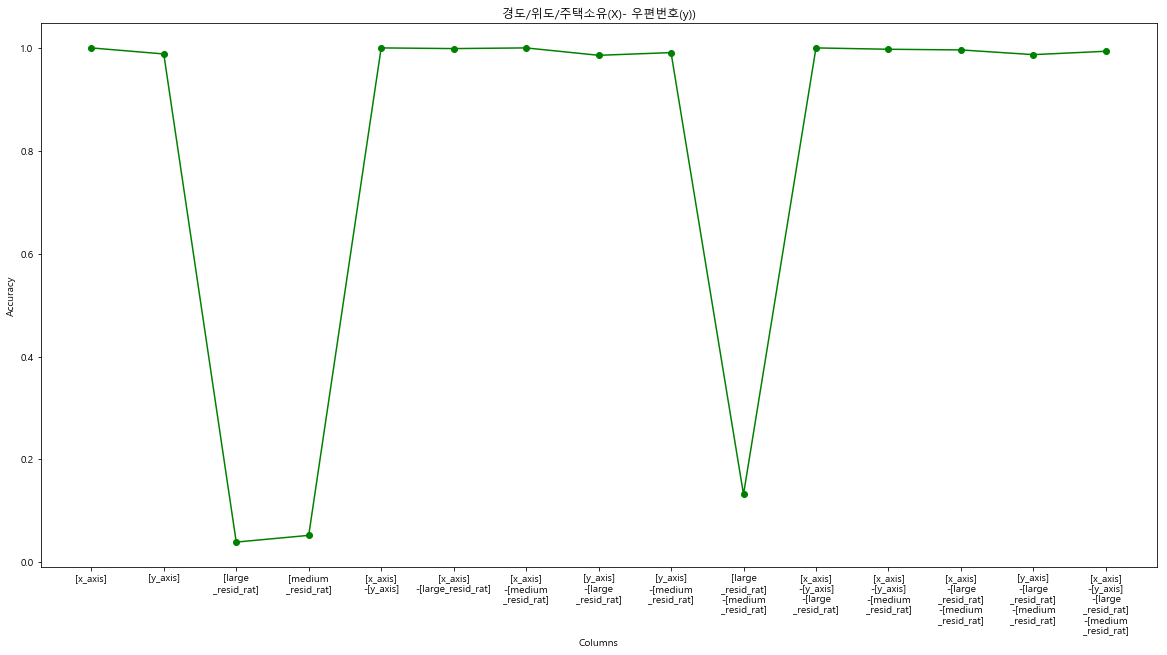

In [16]:
# 관련성 높음
from matplotlib import pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(col,accuracy_score_list,color='green',marker='o',linestyle='solid')
plt.title('경도/위도/주택소유(X)- 우편번호(y))')
plt.ylabel("Accuracy")
plt.xlabel("Columns")
plt.show()

In [17]:
df.columns

Index(['zip_cd', 'x_axis', 'y_axis', 'sex', 'age', 'job_majorc', 'job_smallc',
       'job_public', 'job_profession', 'job_self', 'job_none', 'job_other',
       'avg_income', 'med_income', 'avg_spend', 'avg_foreign_spend',
       'avg_debt', 'avg_debt_credit', 'avg_debt_noneb', 'avg_debt_mortgage',
       'avg_debt_deposit', 'avg_debt_collateral', 'avg_credit_rat',
       'medium_resid_rat', 'large_resid_rat', 'vehicle_own_rat'],
      dtype='object')

### 직업(무직 & 추정불가 제외)에 따른 평균 부채

In [18]:
# 리스트 조합
import itertools

lst = ['job_majorc', 'job_smallc','job_public', 'job_profession', 'job_self']
combs = []

for i in range(1, len(lst)+1):
    els = [list(x) for x in itertools.combinations(lst, i)]
    combs.extend(els)
print(len(combs))

31


In [19]:
#for i in range(len(combs)):
#    print(combs[i])

In [20]:
col = ['[majorc]','[smallc]','[public]','[profession]','[self]','[majorc]\n-[smallc]','[majorc]\n-[public]','[majorc]\n-[profession]','[majorc]\n-[self]','[smallc]\n-[public]','[smallc]\n-[profession]','[smallc]\n-[self]','[public]\n-[profession]','[public]\n-[self]','[profession]\n-[self]','[majorc]\n-[smallc]\n-[public]','[majorc]\n-[smallc]\n-[profession]','[majorc]\n-[smallc]\n-[self]','[majorc]\n-[public]\n-[profession]','[majorc]\n-[public]\n-[self]','[majorc]\n-[profession]\n-[self]','[smallc]\n-[public]\n-[profession]','[smallc]\n-[public]\n-[self]','[smallc]\n-[profession]\n-[self]','[public]\n-[profession]\n-[self]','[majorc]\n-[smallc]\n-[public]\n-[profession]','[majorc]\n-[smallc]\n-[public]\n-[self]','[majorc]\n-[smallc]\n-[profession]\n-[self]','[majorc]\n-[public]\n-[profession]\n-[self]','[smallc]\n-[public]\n-[profession]\n-[self]','[majorc]\n-[smallc]\n-[public]\n-[profession]\n-[self]']
len(col)

31

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

accuracy_score_list = []

for i in range(len(combs)):
    X = df[combs[i]]
    y = df.avg_debt
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
    Dtree = DecisionTreeClassifier()
    Dtree.fit(x_train,y_train)
    predictions_Decisiontree_model = Dtree.predict(x_test)
    accuracy_score_list.append(accuracy_score(y_test,predictions_Decisiontree_model))
print(accuracy_score_list)
print(len(accuracy_score_list))

[0.016629357211384713, 0.017588743204349215, 0.018867924528301886, 0.019507515190278223, 0.014710585225455708, 0.019187719859290055, 0.017908538535337384, 0.01854812919731372, 0.018867924528301886, 0.019507515190278223, 0.017908538535337384, 0.014070994563479372, 0.019507515190278223, 0.016309561880396548, 0.018228333866325552, 0.016309561880396548, 0.018867924528301886, 0.013431403901503039, 0.015350175887432043, 0.01311160857051487, 0.015350175887432043, 0.014710585225455708, 0.014710585225455708, 0.011192836584585865, 0.018867924528301886, 0.014710585225455708, 0.012152222577550368, 0.01566997121842021, 0.016309561880396548, 0.010233450591621363, 0.012472017908538535]
31


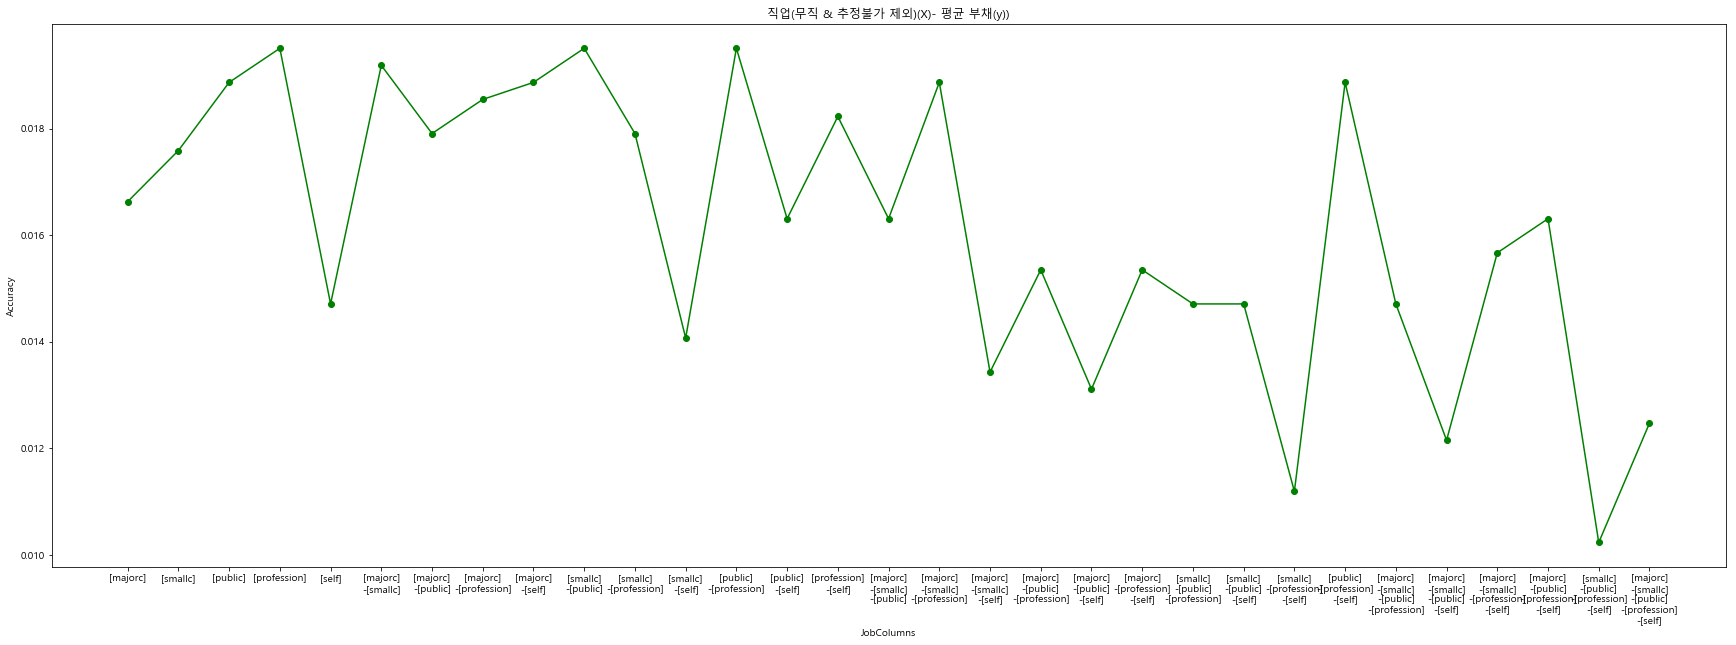

In [22]:
# 관련성 없음
from matplotlib import pyplot as plt

plt.figure(figsize=(30,10))
plt.plot(col,accuracy_score_list,color='green',marker='o',linestyle='solid')
plt.title('직업(무직 & 추정불가 제외)(X)- 평균 부채(y))')
plt.ylabel("Accuracy")
plt.xlabel("JobColumns")
plt.show()